In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("incl/")

import ELPH_dyn
import ELPH_utils




In [4]:
inits = []
kmax = 4.
n_runs = 100
for i,n_kmax in enumerate(np.arange(240,245,5)):
    print(n_kmax)
    inits.append([])
    rng = np.random.default_rng(817)

    paras = np.zeros((n_runs,3))

    paras[:,0] = rng.uniform(low=0.1, high=0.7, size=n_runs)
    paras[:,1] = rng.uniform(low=0.02, high=0.1, size=n_runs)
    paras[:,2] = 0.1

    inits[i] = ELPH_utils.get_gaussian_inits(kmax, n_kmax, paras)


    for r in range(n_runs):
        dist_max = np.amax(inits[i][r][:n_kmax])
        inits[i][r][:n_kmax] *= 0.95 / dist_max
        paras[r,2] = ELPH_dyn.get_density_from_state(inits[i][r][:n_kmax], kmax/n_kmax)

240


In [5]:
for i,n_kmax in enumerate(np.arange(240,245,5)):
    runs = ELPH_utils.get_runs(kmax, n_kmax, inits[i], tmax=2000, n_tmax=400)
    ELPH_utils.save_runs(runs, filename='../runs_rand_inits_n_kmax=' + str(n_kmax))

run  1  from  100


KeyboardInterrupt: 

In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("incl/")

import ELPH_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from ELPH_SVDAPPRX import SVDAPPRX

#wcols = 1.0 + 0.*np.exp(-10.*np.linspace(0,1,runs[0].shape[1]))
wcols = 1

rdim_before = 6
rdim_array = []
for i,n_kmax in enumerate(np.arange(10,215,5)):
    print("Loading " + str(n_kmax))
    runs = ELPH_utils.load_runs(filename='../runs_rand_inits_n_kmax=' + str(n_kmax) + ".npz")


    n_runs = len(runs)
    n_kmax = runs[0].shape[0]

    print(n_runs, 'loaded with n_kmax =', n_kmax)
    model = SVDAPPRX(runs)
    model.train()
    
    for rdim in np.arange(rdim_before-5,n_kmax,1):
        m,s = ELPH_utils.get_KFold_CV_scores(model, runs, folds=5, seed=817, train_kwargs={'rdim':rdim}, score_kwargs={'norm':'max'})
        print(m)
        if m < 0.01:
            rdim_before = rdim
            rdim_array.append(rdim)
            print(rdim)
            break

Loading 10
100 loaded with n_kmax = 10
0.8738787485649434
0.6005470729592746
0.42619009330282276
0.30917497632635793
0.2035435377976608
0.10595668011137879
0.039045199926216245
0.020877781880712324
0.002794306882126728
9
Loading 15
100 loaded with n_kmax = 15
0.3608271686793506
0.25894274213309987
0.19211207344623188
0.13605745066062824
0.10797601168971205
0.06359993828737115
0.025549293433798324
0.011911667149007706
0.005022503911472957
12
Loading 20
100 loaded with n_kmax = 20
0.17840208709107047
0.1581461766118252
0.12578290670801806
0.09634635342042304
0.0667871906423755
0.032349013269585405
0.016303177391968696
0.010564013197041446
0.00412457738275724
15
Loading 25
100 loaded with n_kmax = 25
0.134070165149259
0.1041746072782456
0.05627074331754076
0.043966685055662966
0.029372817667308936
0.019690890194208076
0.013490685744993814
0.005961607974505587
17
Loading 30
100 loaded with n_kmax = 30
0.08485385658767511
0.05757409118323451
0.0447728186891355
0.03656830242106489
0.02613248

Text(0, 0.5, '$R_{dim}/N_k$')

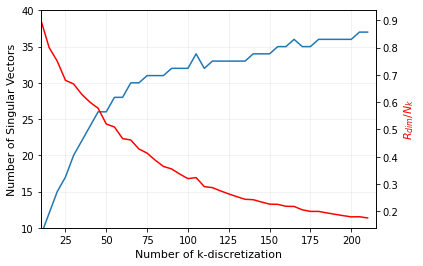

In [16]:
fig,ax = plt.subplots()

fontsize = 11

ax.plot(np.arange(10,215,5), rdim_array)
ax.grid(alpha=0.2)
ax.set_xlim(10,215)
ax.set_ylim(10,40)
ax.set_xlabel("Number of k-discretization", fontsize=fontsize)
ax.set_ylabel("Number of Singular Vectors", fontsize=fontsize)

ax2=ax.twinx()
ax2.plot(np.arange(10,215,5),rdim_array/np.arange(10,215,5), c='r')
ax2.set_ylabel(r"$R_{dim}/N_k$",color="r",fontsize=11)


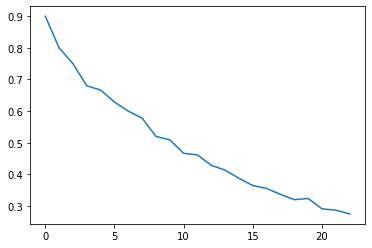